<a href="https://colab.research.google.com/github/RobJavVar/DataSciencePsychNeuro/blob/master/ExerciseSubmissions/05_visualization-as-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/index.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (6 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [4]:
# INSERT CODE HERE
install.packages("gapminder")
library(gapminder)

head(gapminder)




The downloaded binary packages are in
	/var/folders/xn/6zv05bqd6pg_55q7h9xf15h00000gn/T//Rtmp9kFUxF/downloaded_packages


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

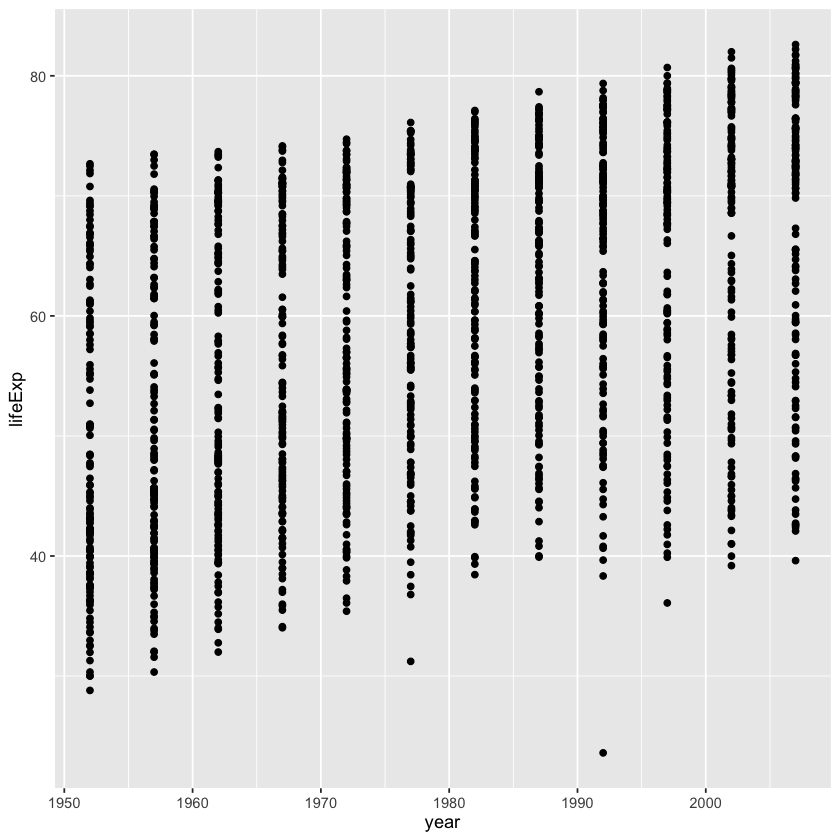

In [9]:
# INSERT CODE HERE
library(ggplot2)

ggplot(gapminder, aes(x = year, y = lifeExp)) +
  geom_point()




We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so.

What trends can you identify in the data?

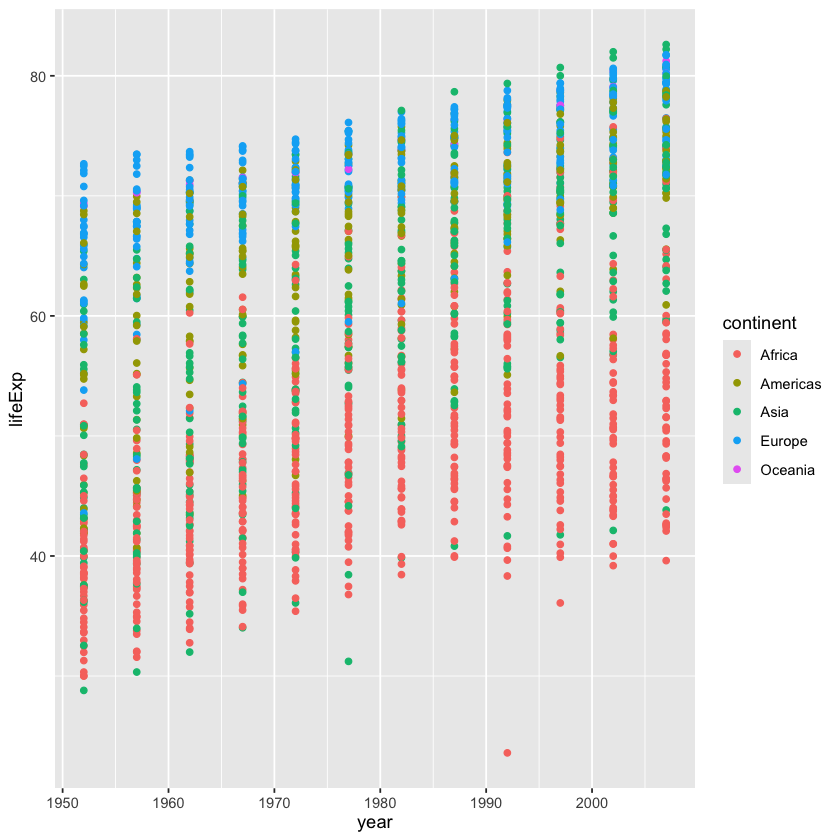

In [10]:
# INSERT CODE HERE

ggplot(gapminder, aes(x = year, y = lifeExp, color = continent)) +
  geom_point()


> *Write your response here.*
> Across all continents, life expectancy increased over time. Africa generally has the lowest life expectancy while Europe generally has the highest life expectancy. Africa has greater varaibility in life expectancy compared to other continents like Europe. 


Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot.

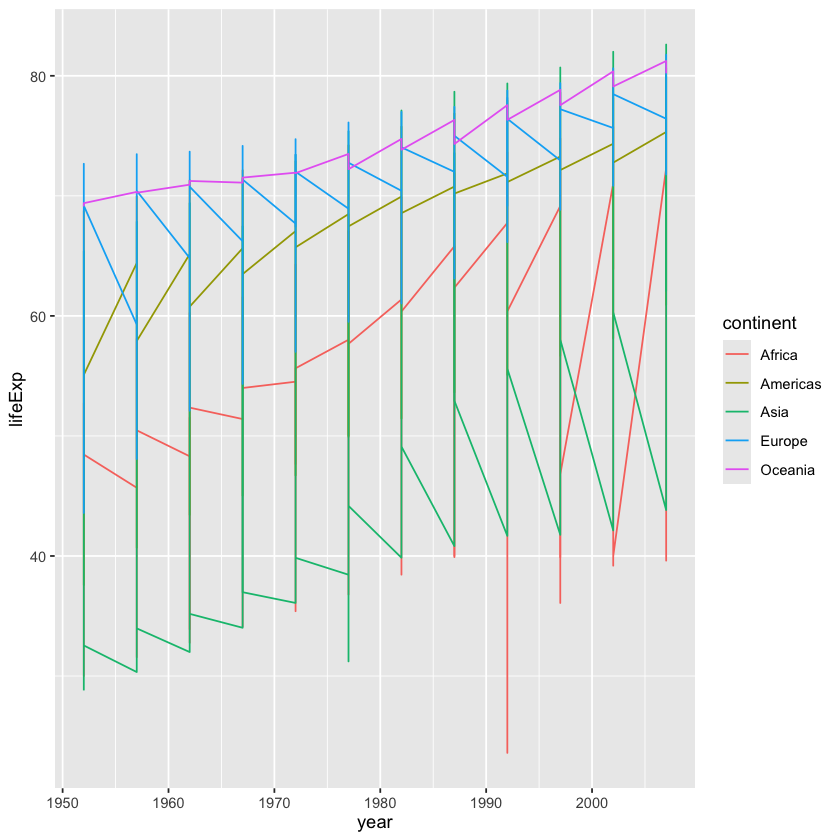

In [14]:
# INSERT CODE HERE

ggplot(gapminder, aes(x = year, y = lifeExp, color = continent)) +
  geom_line() 



Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

> *Write your response here.*
> * It doesn't know which points should be connected by the line without specifying that there is a point on each year that should be connected to the same country. The above line graph is probably showing the line trying to connect all the points of the same color to eachother. 


Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

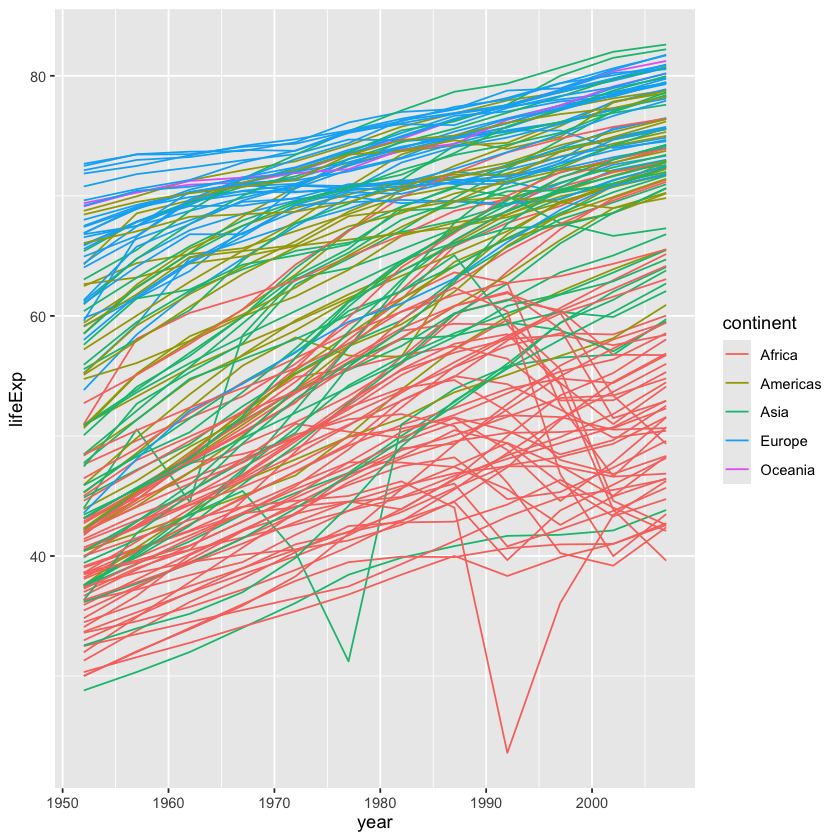

In [15]:
# INSERT CODE HERE

ggplot(gapminder, aes(x = year, y = lifeExp, color = continent, group = country)) +
  geom_line() 


But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer).

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

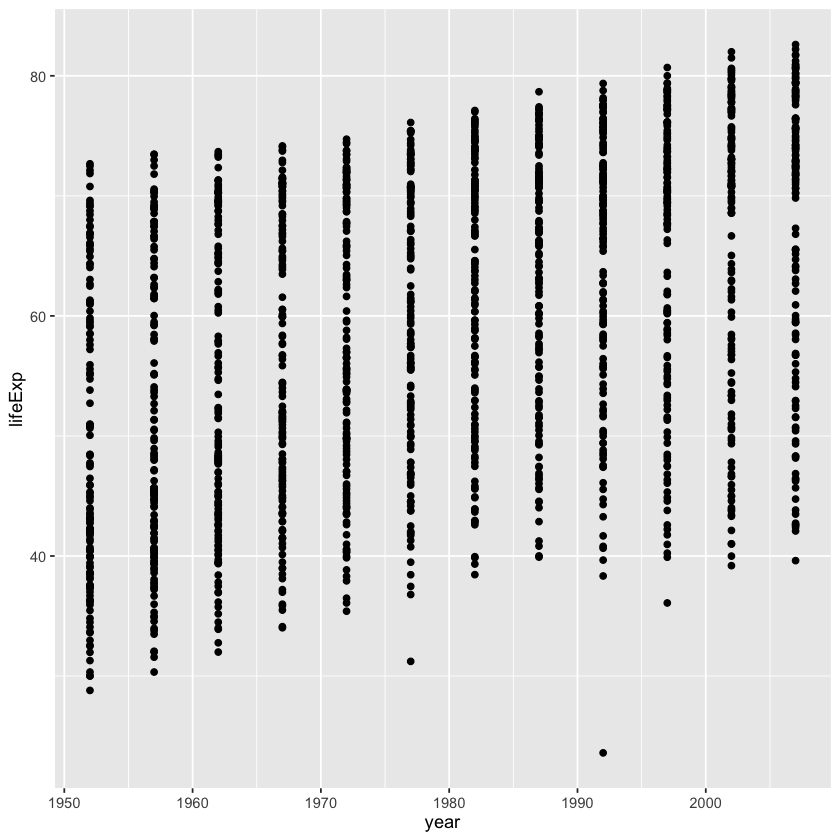

In [18]:
# INSERT CODE HERE

# method 1
ggplot(gapminder, aes(x = year, y = lifeExp, group = country)) +
  geom_line(aes(color = continent)) +   
  geom_point(color = "black")       



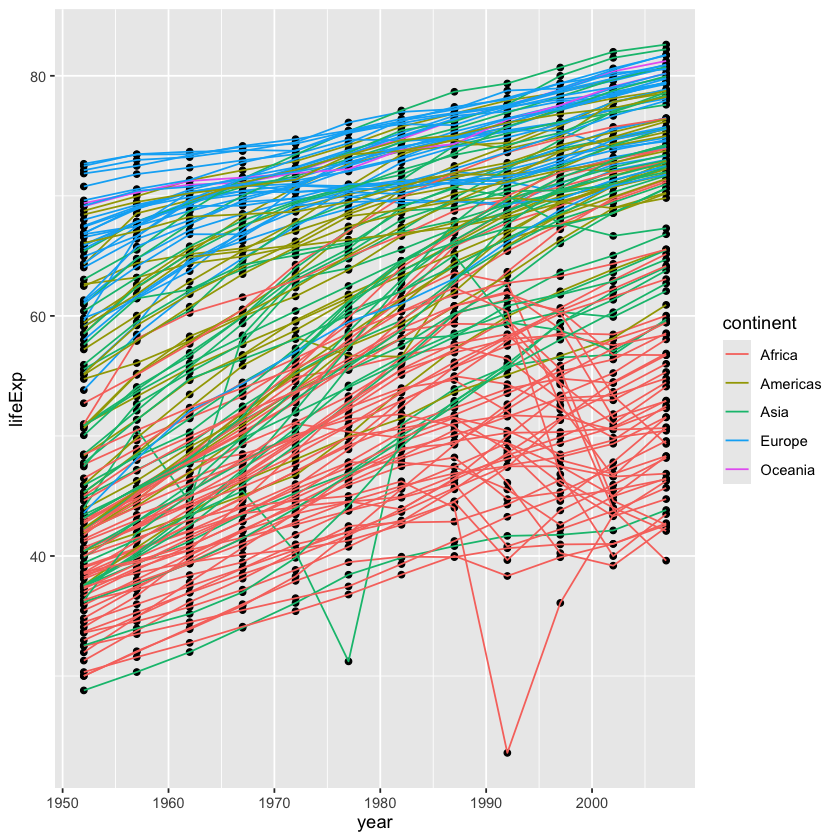

In [19]:
# INSERT CODE HERE

# method 2
ggplot(gapminder, aes(x = year, y = lifeExp, group = country)) +
  geom_point(color = "black") + 
  geom_line(aes(color = continent))  



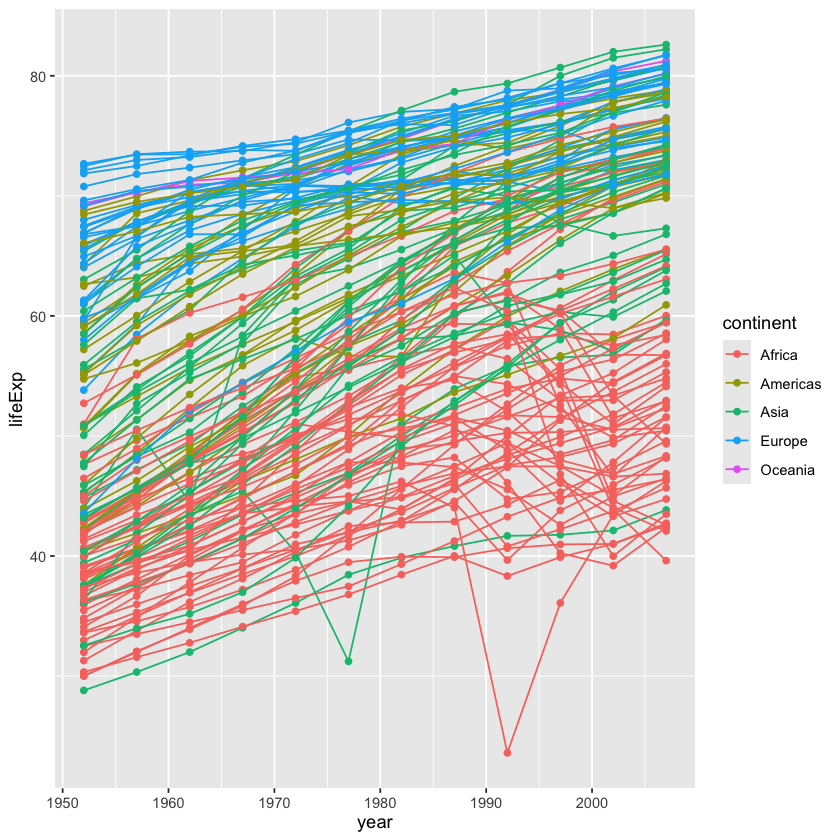

In [20]:
# Aside: colorful points

ggplot(gapminder, aes(x = year, y = lifeExp, group = country)) +
  geom_line(aes(color = continent)) +
  geom_point(aes(color = continent))



---
# 2. Adding statistics (4 points)

`ggplot2` allows easy overlay of statistical models on top of the data.

The graph below shows the relationship between life expectency and GDP per capita:

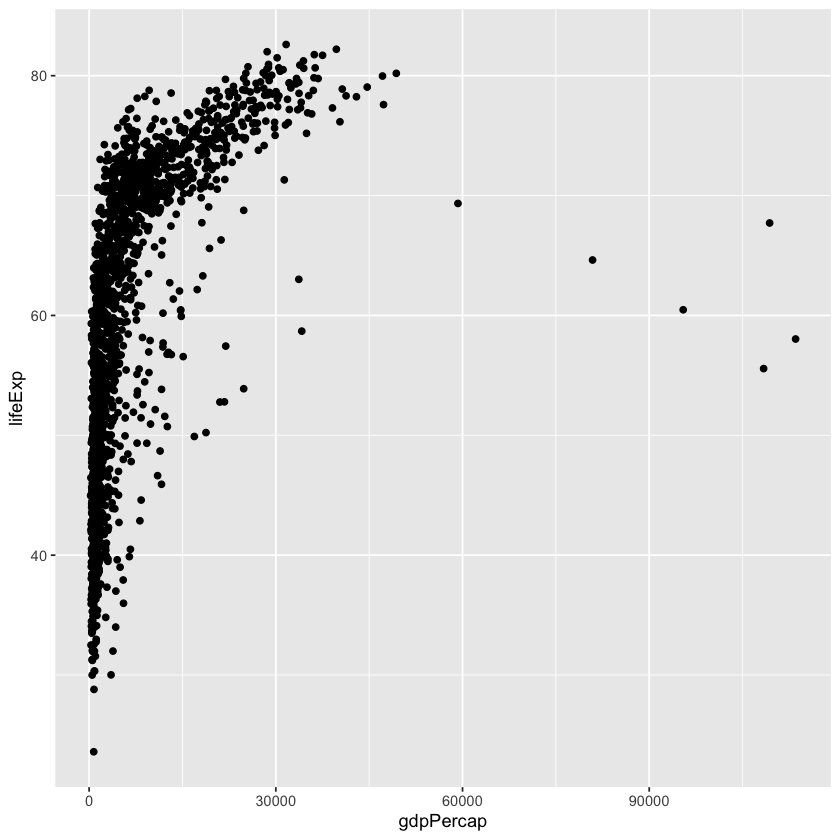

In [ ]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

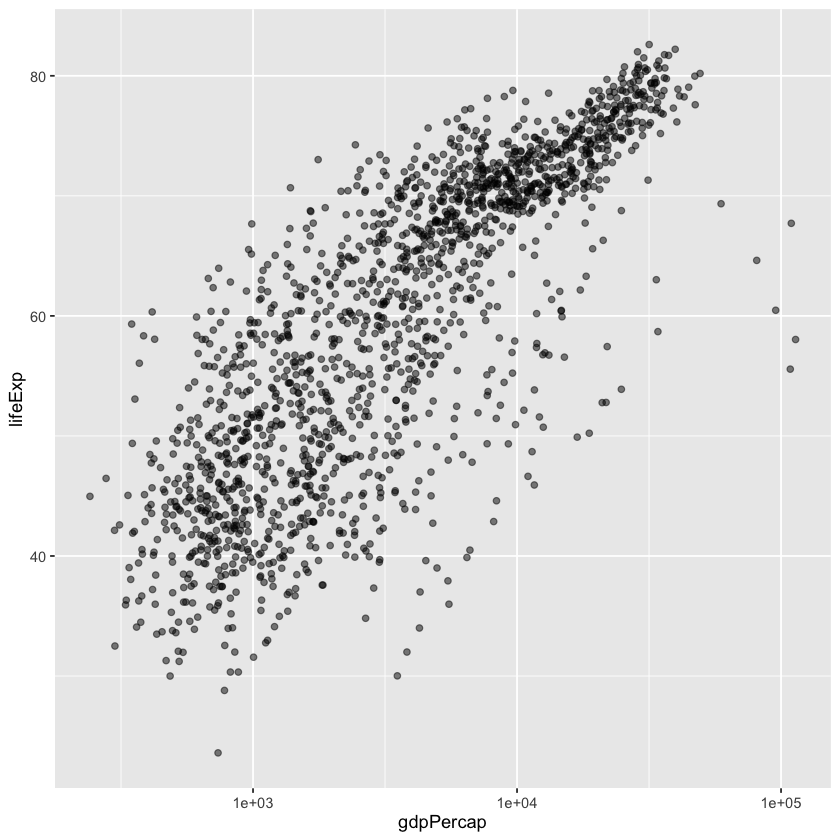

In [28]:
# INSERT CODE HERE

ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5) +       
  scale_x_log10() 



Already we can more easily visualize the trend in the data.

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

`geom_smooth()` using formula = 'y ~ x'


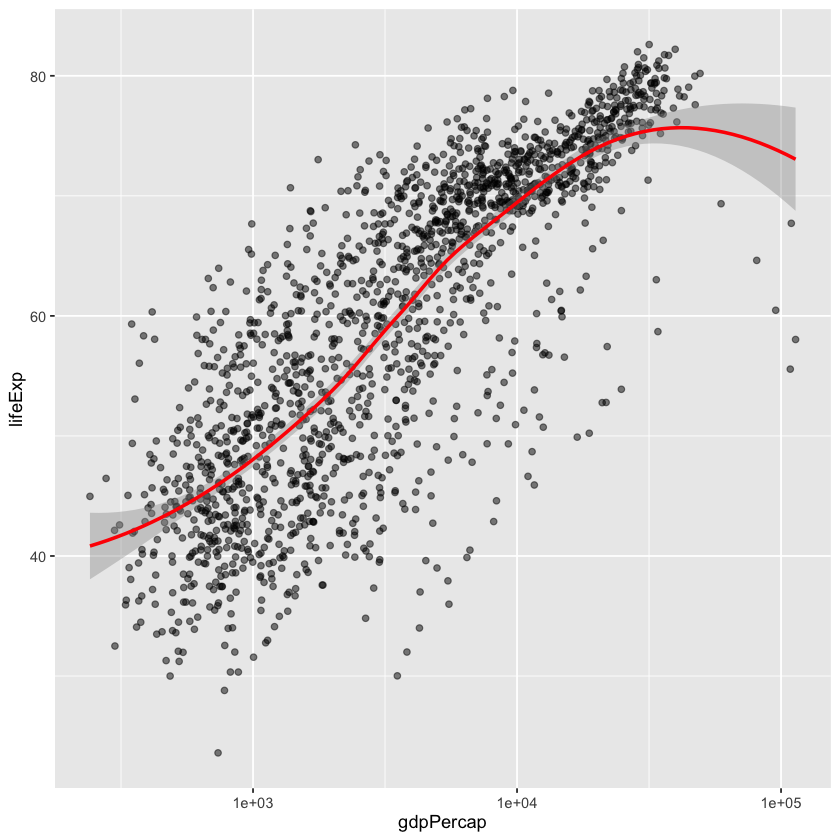

In [25]:
# INSERT CODE HERE

ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5) +       
  scale_x_log10() +              
  geom_smooth(method = "loess", se = TRUE, color = "red") 
 


Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements.


`geom_smooth()` using formula = 'y ~ x'


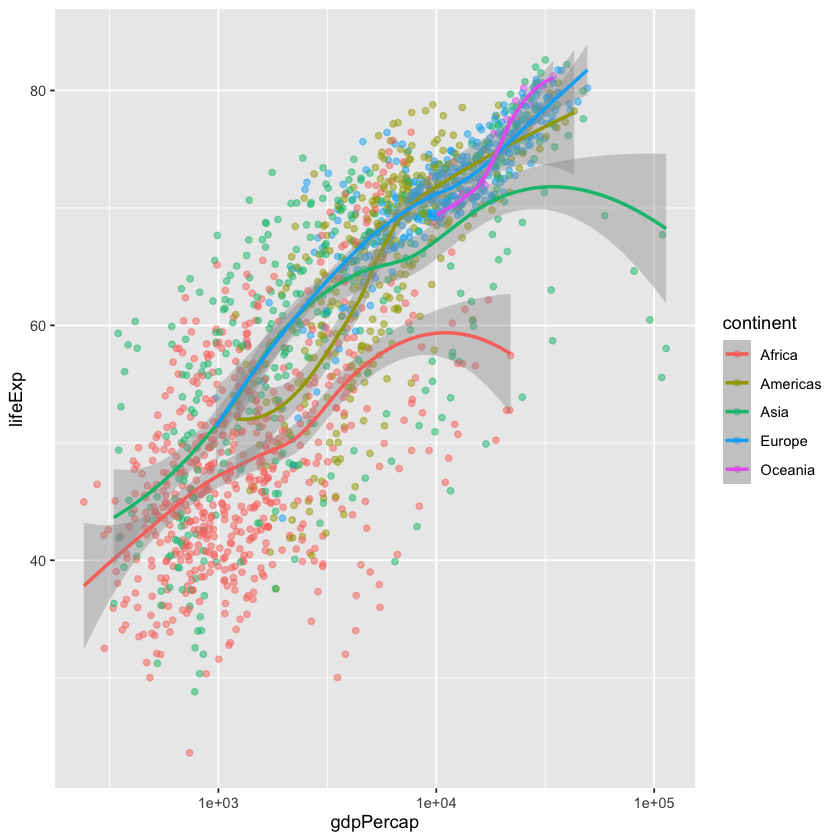

In [29]:
# INSERT CODE HERE

ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point(alpha = 0.5) +         
  scale_x_log10() +                  
  geom_smooth(method = "loess", se = TRUE)



When you are finished, save the notebook as Exercise5.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas.

**DUE:** 5pm EST, Feb 10, 2026

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*